In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
import sys
import numpy
import math

In [41]:
path = "user_path"
data = pd.read_stata(path)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73278 entries, 0 to 73277
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tract                         73278 non-null  int32  
 1   county                        73278 non-null  float32
 2   state                         73278 non-null  float32
 3   cz                            72473 non-null  float64
 4   czname                        73278 non-null  object 
 5   hhinc_mean2000                72302 non-null  float32
 6   mean_commutetime2000          72313 non-null  float32
 7   frac_coll_plus2010            72993 non-null  float32
 8   frac_coll_plus2000            72343 non-null  float32
 9   foreign_share2010             72279 non-null  float32
 10  med_hhinc2016                 72763 non-null  float64
 11  med_hhinc1990                 72313 non-null  float64
 12  popdensity2000                72469 non-null  float32
 13  p

In [43]:
data.head(5)

,tract,county,state,cz,czname,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2010,frac_coll_plus2000,foreign_share2010,...,kfr_pooled_p100,kfr_white_p25,kfr_white_p75,kfr_white_p100,count_pooled,count_white,count_black,count_asian,count_hisp,count_natam
0,20100,1.0,1.0,11101.0,Montgomery,68638.726562,26.171911,0.254428,0.156479,0.009950,...,78921.500000,30327.947266,50820.144531,75126.031250,519.0,457.0,42.0,3.0,4.0,6.0
1,20200,1.0,1.0,11101.0,Montgomery,57242.511719,24.806705,0.267194,0.146932,0.016337,...,74225.367188,42188.812500,54239.121094,66645.695312,530.0,173.0,336.0,1.0,5.0,1.0
2,20300,1.0,1.0,11101.0,Montgomery,75647.726562,25.322525,0.164159,0.224413,0.027096,...,76055.359375,33670.453125,51579.382812,71990.968750,960.0,774.0,151.0,1.0,21.0,2.0
3,20400,1.0,1.0,11101.0,Montgomery,74852.054688,22.965347,0.252744,0.230469,0.015083,...,72586.476562,34181.050781,52847.863281,74330.250000,1123.0,1033.0,40.0,6.0,37.0,0.0
4,20500,1.0,1.0,11101.0,Montgomery,96174.765625,26.222353,0.375063,0.321154,0.046488,...,81792.414062,39540.148438,58699.035156,80415.093750,1867.0,1626.0,137.0,13.0,39.0,8.0


In [44]:
# I've decided to work with tract 06075021700.
# The first two digits refer to the state code
# Next three digits refer to the county code 
# Last 6 digits refer to the tract code.

average income and real standard deviation in county = (35938.50020256358, 9161.630033888952)
average income and real standard deviation in California state = (35765.82345503923, 6559.771214165994)
average income and real standard deviation in the US = (34311.68270910974, 7899.531079423875)


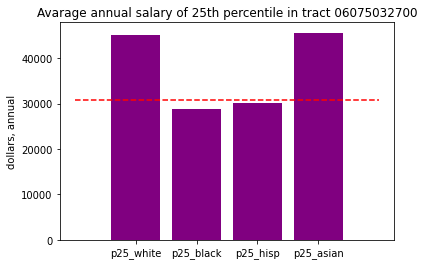

In [45]:
# QUESTION 3 + 4

current_tract_number = "06075021700"
data_current_tract = data[(data['state'] == 6.0)
                        & (data['county'] == 75.0) 
                          & (data['tract'] == 21700)]

# p25 in general in the home tract
kfr_pooled_p25_home = data_current_tract["kfr_pooled_p25"].iloc[0]
# p25 of native americans in the home tract
kfr_natam_p25_home = data_current_tract["kfr_natam_p25"].iloc[0]
# p25 of asian in the home tract
kfr_asian_p25_home = data_current_tract["kfr_asian_p25"].iloc[0]
# p25 of black in the home tract
kfr_black_p25_home = data_current_tract["kfr_black_p25"].iloc[0]
# p25 of hispanic in the home tract
kfr_hisp_p25_home = data_current_tract["kfr_hisp_p25"].iloc[0]
# p25 of white in the home tract
kfr_white_p25_home = data_current_tract["kfr_white_p25"].iloc[0]

races_p25 = [kfr_white_p25_home, kfr_black_p25_home, kfr_hisp_p25_home, kfr_asian_p25_home]
tags = ["p25_white", "p25_black", "p25_hisp", "p25_asian"]

fig, ax = plt.subplots()
ax.bar(tags, races_p25, color="purple")
plt.title('Avarage annual salary of 25th percentile in tract 06075032700')
plt.hlines(y=kfr_pooled_p25_home, xmin=-1,
           xmax=4, color='r', linestyle='--')
plt.ylabel('dollars, annual')

# let's try to do somethong here
# calculate the avarage income for state / entire US

def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = numpy.average(values, weights=weights)
    # Fast and numerically precise:
    variance = numpy.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))

# for county
data_county = data[data['county'] == 75.0]
data_county = data_county[(data_county["kfr_pooled_p25"].notna()) & (data_county["count_pooled"].notna())]
kfrs = data_county["kfr_pooled_p25"].to_numpy()
count = data_county["count_pooled"].to_numpy()
print("average income and real standard deviation in county =", weighted_avg_and_std(kfrs, count))

# for state
data_state = data[data['state'] == 6.0]
data_state = data_state[(data_state["kfr_pooled_p25"].notna()) & (data_state["count_pooled"].notna())]
kfrs = data_state["kfr_pooled_p25"].to_numpy()
count = data_state["count_pooled"].to_numpy()
print("average income and real standard deviation in California state =", weighted_avg_and_std(kfrs, count))

# for US
data_US = data[(data["kfr_pooled_p25"].notna()) & (data["count_pooled"].notna())]
kfrs = data_US["kfr_pooled_p25"].to_numpy()
count = data_US["count_pooled"].to_numpy()
print("average income and real standard deviation in the US =", weighted_avg_and_std(kfrs, count))

In [46]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = numpy.average(values, weights=weights)
    # Fast and numerically precise:
    variance = numpy.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))

average and real standard deviation in county = (53547.62574099419, 8903.787718610878)
average and real standard deviation in California state = (48995.07187541081, 7395.998550962452)
average and real standard deviation in the US = (51284.02767356537, 9326.028721207129)


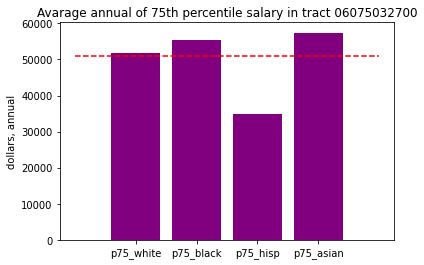

In [47]:
# Question 5 - downward mobility 
# downward mobility for 75th percentile
# part of question 3
current_tract_number = "06075021700"
data_current_tract = data[(data['state'] == 6.0)
                        & (data['county'] == 75.0) 
                          & (data['tract'] == 21700)]

# p75 in general in the home tract
kfr_pooled_p75_home = data_current_tract["kfr_pooled_p75"].iloc[0]
# p75 of native americans in the home tract
kfr_natam_p75_home = data_current_tract["kfr_natam_p75"].iloc[0]
# p75 of asian in the home tract
kfr_asian_p75_home = data_current_tract["kfr_asian_p75"].iloc[0]
# p75 of black in the home tract
kfr_black_p75_home = data_current_tract["kfr_black_p75"].iloc[0]
# p75 of hispanic in the home tract
kfr_hisp_p75_home = data_current_tract["kfr_hisp_p75"].iloc[0]
# p75 of white in the home tract
kfr_white_p75_home = data_current_tract["kfr_white_p75"].iloc[0]

races_p75 = [kfr_white_p75_home, kfr_black_p75_home, kfr_hisp_p75_home, kfr_asian_p75_home]
tags = ["p75_white", "p75_black", "p75_hisp", "p75_asian"]

fig, ax = plt.subplots()
ax.bar(tags, races_p75, color="purple")
plt.title('Avarage annual of 75th percentile salary in tract 06075032700')
plt.hlines(y=kfr_pooled_p75_home, xmin=-1,
           xmax=4, color='r', linestyle='--')
plt.ylabel('dollars, annual')

# Question 5(part of question 4) 

# for county
data_county = data[data['county'] == 75.0]
data_county = data_county[(data_county["kfr_pooled_p75"].notna()) & (data_county["count_pooled"].notna())]
kfrs = data_county["kfr_pooled_p75"].to_numpy()
count = data_county["count_pooled"].to_numpy()
print("average and real standard deviation in county =", weighted_avg_and_std(kfrs, count))

# for state
data_state = data[data['state'] == 6.0]
data_state = data_state[(data_state["kfr_pooled_p75"].notna()) & (data_state["count_pooled"].notna())]
kfrs = data_state["kfr_pooled_p75"].to_numpy()
count = data_state["count_pooled"].to_numpy()
print("average and real standard deviation in California state =", weighted_avg_and_std(kfrs, count))

# for US
data_US = data[(data["kfr_pooled_p75"].notna()) & (data["count_pooled"].notna())]
kfrs = data_US["kfr_pooled_p75"].to_numpy()
count = data_US["count_pooled"].to_numpy()
print("average and real standard deviation in the US =", weighted_avg_and_std(kfrs, count))

average and real standard deviation in county = (72806.40983853425, 17267.189641179284)
average and real standard deviation in California state = (62346.79485592242, 14692.661786670911)
average and real standard deviation in the US = (69218.14595229868, 16362.69301252142)


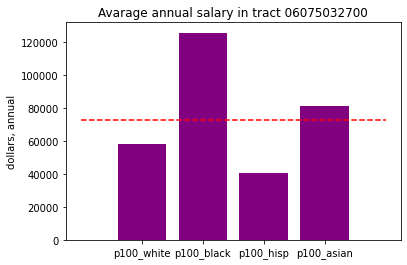

In [48]:
# Question 5 - downward mobility 
# downward mobility for 100th percentile
current_tract_number = "06075021700"
data_current_tract = data[(data['state'] == 6.0)
                        & (data['county'] == 75.0) 
                          & (data['tract'] == 21700)]

# p100 in general in the home tract
kfr_pooled_p100_home = data_current_tract["kfr_pooled_p100"].iloc[0]
# p100 of native americans in the home tract
kfr_natam_p100_home = data_current_tract["kfr_natam_p100"].iloc[0]
# p100 of asian in the home tract
kfr_asian_p100_home = data_current_tract["kfr_asian_p100"].iloc[0]
# p100 of black in the home tract
kfr_black_p100_home = data_current_tract["kfr_black_p100"].iloc[0]
# p100 of hispanic in the home tract
kfr_hisp_p100_home = data_current_tract["kfr_hisp_p100"].iloc[0]
# p100 of white in the home tract
kfr_white_p100_home = data_current_tract["kfr_white_p100"].iloc[0]

races_p100 = [kfr_white_p100_home, kfr_black_p100_home, kfr_hisp_p100_home, kfr_asian_p100_home]
tags = ["p100_white", "p100_black", "p100_hisp", "p100_asian"]

fig, ax = plt.subplots()
ax.bar(tags, races_p100, color="purple")
plt.title('Avarage annual salary in tract 06075032700')
plt.hlines(y=kfr_pooled_p100_home, xmin=-1,
           xmax=4, color='r', linestyle='--')
plt.ylabel('dollars, annual')

# Question 5(part of question 4) 

# for county
data_county = data[data['county'] == 75.0]
data_county = data_county[(data_county["kfr_pooled_p100"].notna()) & (data_county["count_pooled"].notna())]
kfrs = data_county["kfr_pooled_p100"].to_numpy()
count = data_county["count_pooled"].to_numpy()
print("average and real standard deviation in county =", weighted_avg_and_std(kfrs, count))

# for state
data_state = data[data['state'] == 6.0]
data_state = data_state[(data_state["kfr_pooled_p100"].notna()) & (data_state["count_pooled"].notna())]
kfrs = data_state["kfr_pooled_p100"].to_numpy()
count = data_state["count_pooled"].to_numpy()
print("average and real standard deviation in California state =", weighted_avg_and_std(kfrs, count))

# for US
data_US = data[(data["kfr_pooled_p100"].notna()) & (data["count_pooled"].notna())]
kfrs = data_US["kfr_pooled_p100"].to_numpy()
count = data_US["count_pooled"].to_numpy()
print("average and real standard deviation in the US =", weighted_avg_and_std(kfrs, count))

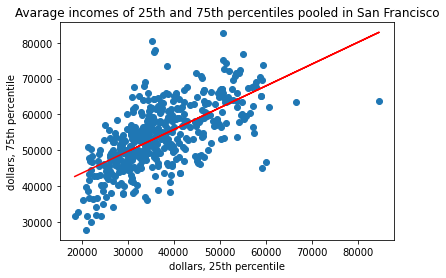

r_value = 0.6442171408092052
p_value = 2.3559145552157244e-54
standard error = 0.03405860153282094


In [49]:
# QUESTION 6
data_county = data[data['county'] == 75.0]
data_county = data_county[data_county['kfr_pooled_p25'].notna() & data_county['kfr_pooled_p75'].notna()]
kfr_pooled_25 = data_county["kfr_pooled_p25"].to_numpy().reshape(-1, 1)
kfr_pooled_75 = data_county["kfr_pooled_p75"].to_numpy().reshape(-1, 1)
linear_regressor = LinearRegression().fit(kfr_pooled_25, kfr_pooled_75)
prediction = linear_regressor.predict(kfr_pooled_25)
plt.scatter(kfr_pooled_25, kfr_pooled_75)
plt.plot(kfr_pooled_25, prediction, "-r")
plt.ylabel('dollars, 75th percentile')
plt.xlabel('dollars, 25th percentile')
plt.title('Avarage incomes of 25th and 75th percentiles pooled in San Francisco')
plt.show()
slope, intercept, r_value, p_value, std_err = stats.linregress(data_county['kfr_pooled_p25'],data_county['kfr_pooled_p75'])
print("r_value =", r_value)
print("p_value =", p_value)
print("standard error =", std_err)


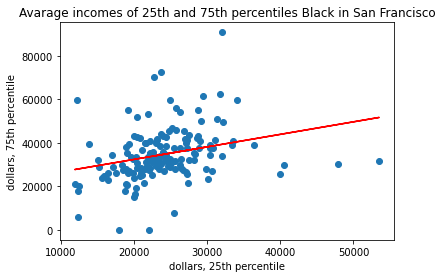

r_value = 0.27873914073018374
p_value = 0.0004446590654271183
standard error = 0.16068355326204614


In [50]:
# QUESTION 7 - black
data_county = data[data['county'] == 75.0]
data_county = data_county[data_county['kfr_black_p25'].notna() & data_county['kfr_black_p75'].notna()]
kfr_black_25 = data_county["kfr_black_p25"].to_numpy().reshape(-1, 1)
kfr_black_75 = data_county["kfr_black_p75"].to_numpy().reshape(-1, 1)
linear_regressor = LinearRegression().fit(kfr_black_25, kfr_black_75)
prediction = linear_regressor.predict(kfr_black_25)
plt.scatter(kfr_black_25, kfr_black_75)
plt.plot(kfr_black_25, prediction, "-r")
plt.ylabel('dollars, 75th percentile')
plt.xlabel('dollars, 25th percentile')
plt.title('Avarage incomes of 25th and 75th percentiles Black in San Francisco')
plt.show()
slope, intercept, r_value, p_value, std_err = stats.linregress(data_county['kfr_black_p25'],data_county['kfr_black_p75'])
print("r_value =", r_value)
print("p_value =", p_value)
print("standard error =", std_err)

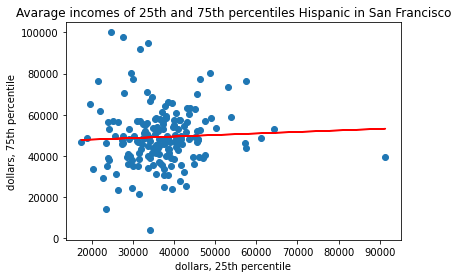

r_value = 0.0470139545409171
p_value = 0.5366934348383678
standard error = 0.11961191256181797


In [51]:
# QUESTION 7 - hispanic
data_county = data[data['county'] == 75.0]
data_county = data_county[data_county['kfr_hisp_p25'].notna() & data_county['kfr_hisp_p75'].notna()]
kfr_hisp_25 = data_county["kfr_hisp_p25"].to_numpy().reshape(-1, 1)
kfr_hisp_75 = data_county["kfr_hisp_p75"].to_numpy().reshape(-1, 1)
linear_regressor = LinearRegression().fit(kfr_hisp_25, kfr_hisp_75)
prediction = linear_regressor.predict(kfr_hisp_25)
plt.scatter(kfr_hisp_25, kfr_hisp_75)
plt.plot(kfr_hisp_25, prediction, "-r")
plt.ylabel('dollars, 75th percentile')
plt.xlabel('dollars, 25th percentile')
plt.title('Avarage incomes of 25th and 75th percentiles Hispanic in San Francisco')
plt.show()
slope, intercept, r_value, p_value, std_err = stats.linregress(data_county['kfr_hisp_p25'],data_county['kfr_hisp_p75'])
print("r_value =", r_value)
print("p_value =", p_value)
print("standard error =", std_err)

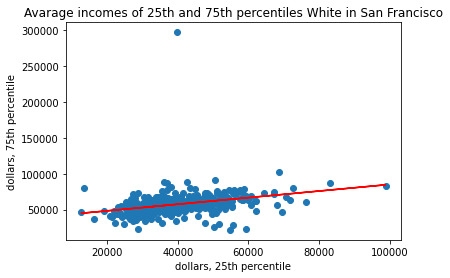

r_value = 0.31306902203782033
p_value = 3.290842952819629e-11
standard error = 0.0675957690741579


In [52]:
# QUESTION 7 - white
data_county = data[data['county'] == 75.0]
data_county = data_county[data_county['kfr_white_p25'].notna() & data_county['kfr_white_p75'].notna()]
kfr_white_25 = data_county["kfr_white_p25"].to_numpy().reshape(-1, 1)
kfr_white_75 = data_county["kfr_white_p75"].to_numpy().reshape(-1, 1)
linear_regressor = LinearRegression().fit(kfr_white_25, kfr_white_75)
prediction = linear_regressor.predict(kfr_white_25)
plt.scatter(kfr_white_25, kfr_white_75)
plt.plot(kfr_white_25, prediction, "-r")
plt.ylabel('dollars, 75th percentile')
plt.xlabel('dollars, 25th percentile')
plt.title('Avarage incomes of 25th and 75th percentiles White in San Francisco')
plt.show()
slope, intercept, r_value, p_value, std_err = stats.linregress(data_county['kfr_white_p25'],data_county['kfr_white_p75'])
print("r_value =", r_value)
print("p_value =", p_value)
print("standard error =", std_err)

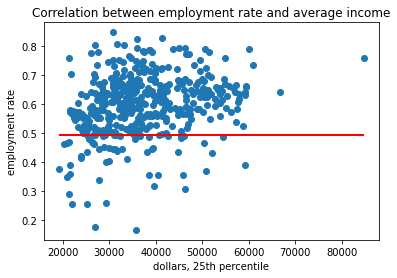

r_value = 0.25806552226758883
p_value = 2.702149736325286e-08
standard error = 4.904382180198961e-07


In [53]:
# QUESTION 8
# Thanks for employment rate of 2000! Very useful!!!!!! (no)
data_county = data[data['county'] == 75.0]
data_county = data_county[data_county['emp2000'].notna() & data_county['kfr_pooled_p25'].notna()]
emp2000 = data_county["emp2000"].to_numpy().reshape(-1, 1)
kfr_pooled_25 = data_county["kfr_pooled_p25"].to_numpy().reshape(-1, 1)
linear_regressor = LinearRegression().fit(kfr_pooled_25, emp2000)
prediction = linear_regressor.predict(emp2000)
plt.scatter(kfr_pooled_25, emp2000)
plt.plot(kfr_pooled_25, prediction, "-r")
plt.ylabel('employment rate')
plt.xlabel('dollars, 25th percentile')
plt.title('Correlation between employment rate and average income')
plt.show()
slope, intercept, r_value, p_value, std_err = stats.linregress(data_county['kfr_pooled_p25'], data_county['emp2000'])
print("r_value =", r_value)
print("p_value =", p_value)
print("standard error =", std_err)